Hi and welcome to the project, I hope it explains my thought process well

### Part I : Scraping the data
So for the Scraping part, I opted to use PRAW (The Python Reddit API Wrapper).  
It greatly reduced the amount of time & effort it took to scrape reddit.  
Also going to use pandas

In [ ]:
!pip install praw
import praw
import pandas as pd

#Importing the environment variables for reddit auth 
secret = os.environ["REDDIT_PRAW_AUTH_SECRET"]
reid = os.environ["REDDIT_PRAW_AUTH_REID"]

You should consider upgrading via the 'pip install --upgrade pip' command.


Next we will make a reddit object and scrape the data from reddit.  
Then we'll append it to the the dictionary that I'll just be aptly be calling "lowquality_posts".  
Not just because most of the posts on the sub are low quality, but also because it's not processed yet, and hence "low quality"

In [ ]:
reddit = praw.Reddit(client_id=reid, client_secret= secret, user_agent='reddscrape v0.3 by /u/Lunchb0ne')

In [ ]:
lq_dict = {'id': [],'title': [],'score':[],'selftext': [], 'media':[], 'comments':[], 'flair':[]}

persisntant_flairs = ["AskIndia","Non-Political","Scheduled","Photography","Science/Technology","Politics","Business/Finance","Policy/Economy","Sports","Food"]
# taking 300 posts from each flair

for flairs in tqdm(persisntant_flairs):
    for post in reddit.subreddit('india').search('flair:{}'.format(flairs), limit=300):
        lq_dict['id'].append(post.id)
        lq_dict['title'].append(post.title)
        lq_dict['score'].append(post.score)
        lq_dict['selftext'].append(post.selftext)
        # checking if there is media or not
        if (post.url != ("https://www.reddit.com"+ post.permalink)):
            lq_dict['media'].append(post.url)
        else:
            lq_dict['media'].append(" ")
        allcomments = []
        # adding all top level comments to a list with then gets added to a dataframe
        post.comments.replace_more(limit=0)
        for comment in post.comments:
            allcomments.append(comment.body)
        lq_dict['comments'].append(allcomments)
        lq_dict['flair'].append(post.link_flair_text)

100%|██████████| 10/10 [22:45<00:00, 136.54s/it]


Saving these posts to a file after making a DataFrame with them

In [ ]:
lq_df = pd.DataFrame(lq_dict)
lq_df.to_csv("./data/postsIndiav4.csv")

Now we load and check if it is loading fine

In [ ]:
lq_loaded = pd.read_csv("./data/postsIndiav4.csv")
lq_loaded.head()

,Unnamed: 0,id,title,score,selftext,media,comments,flair
0,0,g014wc,"Lost my Job, Sick Mother and Paralysed Dad, In...",1043,Hi....It's really tough time for everyone. I r...,,"[""I'm a freelancer. Don't listen to the idiots...",AskIndia
1,1,fxofyu,Why does the government come with a begging bo...,646,"We have floods, terrorist attacks, famines due...",,"[""I don't understand why they don't use money ...",AskIndia
2,2,g4lrhm,People stuck with their family during the lock...,159,I don't think we've spend so much time with fa...,,['yesterday we had a major fight. (me and my w...,AskIndia
3,3,g6tldd,How prominent is the caste system in India now...,107,Does caste still exist in India? Do people sti...,,['Very. \n\n\nHad a very good friend who was ...,AskIndia
4,4,fvy95j,Men who are 30+ and have decided not to get ma...,264,The corona virus has given me some time to thi...,,"[""Plan your finances. Work and enjoy in your o...",AskIndia


As we can see it does have some good ~~posts~~ structure, but it still needs a lot of processing  
Let's check all the flairs that we have in our data

In [ ]:
print(lq_loaded.groupby('flair').count())

                             Unnamed: 0   id  title  score  selftext  media  \
flair                                                                         
AskIndia                            241  241    241    241       233    241   
Business/Finance                    247  247    247    247        65    247   
Food                                241  241    241    241        87    241   
Non-Political                       245  245    245    245        58    245   
Photography                         243  243    243    243         4    243   
Policy/Economy                      244  244    244    244        59    244   
Policy/Economy [Megathread]           1    1      1      1         0      1   
Politics                            249  249    249    249        41    249   
Politics [Megathread]                 1    1      1      1         0      1   
Scheduled                           250  250    250    250       248    250   
Science/Technology                  244  244    244 

Looks like we got some weird Megathread flair mixed up in here, let's drop it

In [ ]:
lq_loaded = lq_loaded[lq_loaded['flair']!=("Policy/Economy [Megathread]"and"Politics [Megathread]")]
print(lq_loaded.groupby('flair').count())

                    Unnamed: 0   id  title  score  selftext  media  comments
flair                                                                       
AskIndia                   241  241    241    241       233    241       241
Business/Finance           247  247    247    247        65    247       247
Food                       241  241    241    241        87    241       241
Non-Political              245  245    245    245        58    245       245
Photography                243  243    243    243         4    243       243
Policy/Economy             244  244    244    244        59    244       244
Politics                   249  249    249    249        41    249       249
Scheduled                  250  250    250    250       248    250       250
Science/Technology         244  244    244    244        80    244       244
Sports                     215  215    215    215        26    215       215


Good, so now with that fixed, let's save it to a file called postsIndia

In [ ]:
lq_loaded.to_csv("./csv/postsIndia.csv")

### Part II : Analysis

Let's analyse the data we got  


In [ ]:
# cue me analysing shit and failing miserably
# https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

### Part III : Building the detector

So first things first, let's use some conventional machine learning models to train and predict

Let's start with the preprocessing for these

In [ ]:
to_combine = pd.read_csv("./csv/postsIndia.csv")
to_combine

,Unnamed: 0,Unnamed: 0.1,id,title,score,selftext,media,comments,flair
0,0,0,g014wc,"Lost my Job, Sick Mother and Paralysed Dad, In...",1043,Hi....It's really tough time for everyone. I r...,,"[""I'm a freelancer. Don't listen to the idiots...",AskIndia
1,1,1,fxofyu,Why does the government come with a begging bo...,646,"We have floods, terrorist attacks, famines due...",,"[""I don't understand why they don't use money ...",AskIndia
2,2,2,g4lrhm,People stuck with their family during the lock...,159,I don't think we've spend so much time with fa...,,['yesterday we had a major fight. (me and my w...,AskIndia
3,3,3,g6tldd,How prominent is the caste system in India now...,107,Does caste still exist in India? Do people sti...,,['Very. \n\n\nHad a very good friend who was ...,AskIndia
4,4,4,fvy95j,Men who are 30+ and have decided not to get ma...,264,The corona virus has given me some time to thi...,,"[""Plan your finances. Work and enjoy in your o...",AskIndia
5,5,5,g6isgb,What is absolutely worth the money,57,"I'll go first, from what I've known and experi...",,['A good mattress.\n\nGood comfy pair of shoes...,AskIndia
6,6,6,g1lmhg,[Please Advice] Reality punched me in the face...,439,"Sorry Reddit, this post is going to be long. P...",,"[""One thing I will say is don't try to clear o...",AskIndia
7,7,7,g42vfo,What is the PM CARES fund being used for? how ...,215,"In this need of the hour, many citizens are co...",,"[""My mother works in SBI and she told me it's ...",AskIndia
8,8,8,g0igt7,"r/India: If money is no bar, would you prefer ...",137,Seems like everybody here is very critical of ...,,"['if money is not a thing, i would choose indi...",AskIndia
9,9,9,g590ut,"So, I'm an American dating a South Indian, and...",64,"So, I'm dating a grad student from Coimbature....",,"['Every human being is different, so please ta...",AskIndia


Let's do the pre-processing by making a dataframe which combines the Title of the post, comments and the body to predict

In [ ]:
combined_df = pd.DataFrame(columns=["flair","title","selftext", "comments","combined"])

In [ ]:
combined_df.flair = to_combine.flair
combined_df.title = to_combine.title 
combined_df.selftext =  to_combine.selftext
combined_df.comments = to_combine.comments
combined_df.reset_index(drop=True, inplace=True)
combined_df = combined_df[combined_df['flair'].notna()]
combined_df

,flair,title,selftext,comments,combined
0,AskIndia,"Lost my Job, Sick Mother and Paralysed Dad, In...",Hi....It's really tough time for everyone. I r...,"[""I'm a freelancer. Don't listen to the idiots...","Lost my Job, Sick Mother and Paralysed Dad, In..."
1,AskIndia,Why does the government come with a begging bo...,"We have floods, terrorist attacks, famines due...","[""I don't understand why they don't use money ...",Why does the government come with a begging bo...
2,AskIndia,People stuck with their family during the lock...,I don't think we've spend so much time with fa...,['yesterday we had a major fight. (me and my w...,People stuck with their family during the lock...
3,AskIndia,How prominent is the caste system in India now...,Does caste still exist in India? Do people sti...,['Very. \n\n\nHad a very good friend who was ...,How prominent is the caste system in India now...
4,AskIndia,Men who are 30+ and have decided not to get ma...,The corona virus has given me some time to thi...,"[""Plan your finances. Work and enjoy in your o...",Men who are 30+ and have decided not to get ma...
5,AskIndia,What is absolutely worth the money,"I'll go first, from what I've known and experi...",['A good mattress.\n\nGood comfy pair of shoes...,What is absolutely worth the money I'll go fir...
6,AskIndia,[Please Advice] Reality punched me in the face...,"Sorry Reddit, this post is going to be long. P...","[""One thing I will say is don't try to clear o...",[Please Advice] Reality punched me in the face...
7,AskIndia,What is the PM CARES fund being used for? how ...,"In this need of the hour, many citizens are co...","[""My mother works in SBI and she told me it's ...",What is the PM CARES fund being used for? how ...
8,AskIndia,"r/India: If money is no bar, would you prefer ...",Seems like everybody here is very critical of ...,"['if money is not a thing, i would choose indi...","r/India: If money is no bar, would you prefer ..."
9,AskIndia,"So, I'm an American dating a South Indian, and...","So, I'm dating a grad student from Coimbature....","['Every human being is different, so please ta...","So, I'm an American dating a South Indian, and..."


Great so now we can populate combined

In [ ]:
for ind in combined_df.index:
    comment_string = ""
    # print(list(combined_df['comments'][ind]))
    for comment in list(combined_df['comments'][ind]):
        comment_string = comment_string + comment
    combined_df['combined'][ind] = combined_df['title'][ind] + " " + str(combined_inputdf['selftext'][ind])+ " " + comment_string
combined_df['combined']

0       Lost my Job, Sick Mother and Paralysed Dad, In...
1       Why does the government come with a begging bo...
2       People stuck with their family during the lock...
3       How prominent is the caste system in India now...
4       Men who are 30+ and have decided not to get ma...
                              ...                        
2414    Indian packaged foods least healthy in world: ...
2415    Decoding the Indian culinary art of the achaar...
2416    Eating Sunflower seeds to gain weight. nan ['I...
2417    Ghost’s child [Translation of Hindi on packet]...
2418    Great discounts by Zomato Does anyone know whi...
Name: combined, Length: 2419, dtype: object

Great!  
Let's save this data to a csv and try some models on it!

In [ ]:
combined_df[['combined', 'flair']].to_csv("./csv/combined.csv")

In [ ]:
combined = pd.read_csv("./csv/combined.csv")
combined

,Unnamed: 0,combined,flair
0,0,"Lost my Job, Sick Mother and Paralysed Dad, In...",AskIndia
1,1,Why does the government come with a begging bo...,AskIndia
2,2,People stuck with their family during the lock...,AskIndia
3,3,How prominent is the caste system in India now...,AskIndia
4,4,Men who are 30+ and have decided not to get ma...,AskIndia
5,5,What is absolutely worth the money I'll go fir...,AskIndia
6,6,[Please Advice] Reality punched me in the face...,AskIndia
7,7,What is the PM CARES fund being used for? how ...,AskIndia
8,8,"r/India: If money is no bar, would you prefer ...",AskIndia
9,9,"So, I'm an American dating a South Indian, and...",AskIndia


Time to fit the Vectorizer on this data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(combined.combined).toarray()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


And let's not forget to encode the labels

In [ ]:
from sklearn import preprocessing

labelencoder = preprocessing.LabelEncoder()
labels = labelencoder.fit_transform(combined['flair'])

labelencoder.classes_

array(['AskIndia', 'Business/Finance', 'Food', 'Non-Political',
       'Photography', 'Policy/Economy', 'Politics', 'Scheduled',
       'Science/Technology', 'Sports'], dtype=object)

Now we can load in some models

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

times = 5

Now we fit and plot all the models

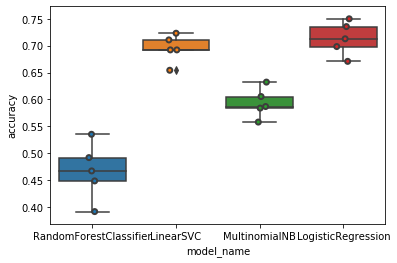

In [ ]:
times_df = pd.DataFrame(index=range(times * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=times)

  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

times_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=times_df)
sns.stripplot(x='model_name', y='accuracy', data=times_df, jitter=True, linewidth=2)

plt.show()

Checking the Mean for each of them

In [ ]:
times_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.694485
LogisticRegression        0.713500
MultinomialNB             0.593216
RandomForestClassifier    0.466691
Name: accuracy, dtype: float64

Surprisingly Logistic Regression does the best, hmmm this is interesting right?

Let's do something a bit more daunting, let's use LSTM to predict these flairs!  
We won't be using BERT or something, because we don't really have some extra P6000s lying around here

In [ ]:
!pip install tqdm
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import operator
from collections import Counter
import re

from tqdm import tqdm
tqdm.pandas()

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers

%matplotlib inline
import matplotlib.pyplot as plt
# hyperparam

vocab_size = 5000
embedding_dim = 35
max_length = 350
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

You should consider upgrading via the 'pip install --upgrade pip' command.
/opt/venv/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Let's check the tensorflow version and if it's executing eagerly

In [ ]:
print(tf.__version__)

print(tf.executing_eagerly())

2.1.0
True


In [ ]:
combined = pd.read_csv("./csv/combined.csv")
combined = combined.sample(frac=1).reset_index(drop=True)

def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return x

combined['combined'] = combined['combined'].apply(lambda x: clean_text(x))
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

combined['combined'] = combined['combined'].apply(lambda x: replace_contractions(x))

from sklearn import preprocessing

labelencoder = preprocessing.LabelEncoder()
df_label = labelencoder.fit_transform(combined['flair'])

combined

,Unnamed: 0,combined,flair
0,1226,BJP wants us to see Indian Sonia Gandhi as Ita...,Politics
1,697,"Random Daily Discussion Thread - January 28, 2...",Scheduled
2,2064,Bodybuilding's Indian Monster crowned Mr Unive...,Sports
3,842,"Kullu, India 07/01/2019 OP6 [2176x4608] Unedit...",Photography
4,575,"Random Daily Discussion Thread - March 07, 202...",Scheduled
5,527,Late Night Random Discussion Thread ! ^Beep ^B...,Scheduled
6,660,"Random Daily Discussion Thread - January 29, 2...",Scheduled
7,1615,Latest 2GW solar auction in India shows prices...,Business/Finance
8,42,Why do Indian Men Love to Pose as Women Online...,AskIndia
9,1413,India’s Hindu Nationalists Are Inciting Hate B...,Politics


Let's make some splits for the training data

In [ ]:
train_size = int(len(combined) * training_portion)

train_mat = combined.combined[0: train_size]
train_labels = df_label[0: train_size]

validation_mat = combined.combined[train_size:]
validation_labels = df_label[train_size:]

print(train_size)
print((train_mat))
print((train_labels))
print((validation_mat))
print((validation_labels))

1935
0       BJP wants us to see Indian Sonia Gandhi as Ita...
1       Random Daily Discussion Thread - January 28, 2...
2       Bodybuilding's Indian Monster crowned Mr Unive...
3       Kullu, India 07/01/2019 OP6 [2176x4608] Unedit...
4       Random Daily Discussion Thread - March 07, 202...
                              ...                        
1930    Random Daily Discussion Thread - March 05, 202...
1931    The time is right for OneHealth science: Emerg...
1932    Any idea what has happened to quora Hey guys. ...
1933    RBI joins coronavirus fight with big-bang rate...
1934    I am not very religious, but a trip to vaishno...
Name: combined, Length: 1935, dtype: object
[6 7 9 ... 0 1 4]
1935    Intel joins CBSE to empower 1 lakh Indian stud...
1936    What is this government doing wrong on economi...
1937    Never expected to see this on the online order...
1938    Leander Paes to retire in 2020 nan ["Sad, he i...
1939    Rare pic of 70s Bollywood nan ['Is that the an...
     

Let's get into some padding and preprocessing action

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Time to run the tokenizer

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_mat)

word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'the': 2,
 'n': 3,
 'to': 4,
 "'": 5,
 'and': 6,
 'a': 7,
 'is': 8,
 'of': 9,
 'i': 10}

Let's get those sequences

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_mat)
print(train_sequences[10])

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_sequences = tokenizer.texts_to_sequences(validation_mat)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

[283, 1235, 281, 9, 1492, 1808, 1, 247, 620, 408, 3779, 1106, 111, 1, 8, 1, 1, 620, 5, 1, 1, 17, 1930, 114, 15, 1369, 4, 1210, 104, 48, 77, 100, 4, 4116, 2280, 4348, 2198, 5]


In [ ]:
print(train_mat[10])

BJP spreading virus of communal hatred, prejudice during pandemic, says Sonia Gandhi nan ['Water is wet', 'During pandemic?', 'Absolutely true', "This bitch does not deserve to speak after what she did to Andhra Pradesh.", 'Still alive?']


Let's make the model

In [ ]:
# easier hyperparam tuning
dropout = 0.5

In [ ]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size vocab_size, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dropout(dropout),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(len(labelencoder.classes_), activation='softmax')
])
# model.summary()

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.05, mode='min',patience=10, verbose=1)
mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

Compiling and running the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
num_epochs = 30
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2, callbacks=[es, mc], shuffle=True)

Train on 1935 samples, validate on 484 samples
Epoch 1/30

Epoch 00001: val_accuracy improved from -inf to 0.20041, saving model to best_model.h5
1935/1935 - 6s - loss: 2.2302 - accuracy: 0.1814 - val_loss: 2.1465 - val_accuracy: 0.2004
Epoch 2/30

Epoch 00002: val_accuracy improved from 0.20041 to 0.23347, saving model to best_model.h5
1935/1935 - 2s - loss: 2.0282 - accuracy: 0.2496 - val_loss: 1.9028 - val_accuracy: 0.2335
Epoch 3/30

Epoch 00003: val_accuracy improved from 0.23347 to 0.34298, saving model to best_model.h5
1935/1935 - 2s - loss: 1.8947 - accuracy: 0.2739 - val_loss: 1.8125 - val_accuracy: 0.3430
Epoch 4/30

Epoch 00004: val_accuracy did not improve from 0.34298
1935/1935 - 2s - loss: 1.7695 - accuracy: 0.3220 - val_loss: 1.7133 - val_accuracy: 0.3264
Epoch 5/30

Epoch 00005: val_accuracy did not improve from 0.34298
1935/1935 - 2s - loss: 1.6226 - accuracy: 0.3623 - val_loss: 1.6763 - val_accuracy: 0.3430
Epoch 6/30

Epoch 00006: val_accuracy improved from 0.34298 t

Clearly the model is overfitting, but we'll use this as I wanna be cool!

In [ ]:
saved_model = tf.keras.models.load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(train_padded, train_labels, verbose=0)
_, test_acc = saved_model.evaluate(validation_padded, validation_labels, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.945, Test: 0.523


In [ ]:
import joblib

# Let's save the label encoder
joblib.dump(labelencoder, 'label_encoder.joblib')

# Save the tokenizer
joblib.dump(tokenizer, 'tokenizer.joblib')

['tokenizer.joblib']